In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading Dataset

In [24]:
import pandas as pd

df=pd.read_csv('/content/drive/MyDrive/Data Science Lab/Breast_Cancer/breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [25]:
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

# Visualization

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

*   **Histogram**



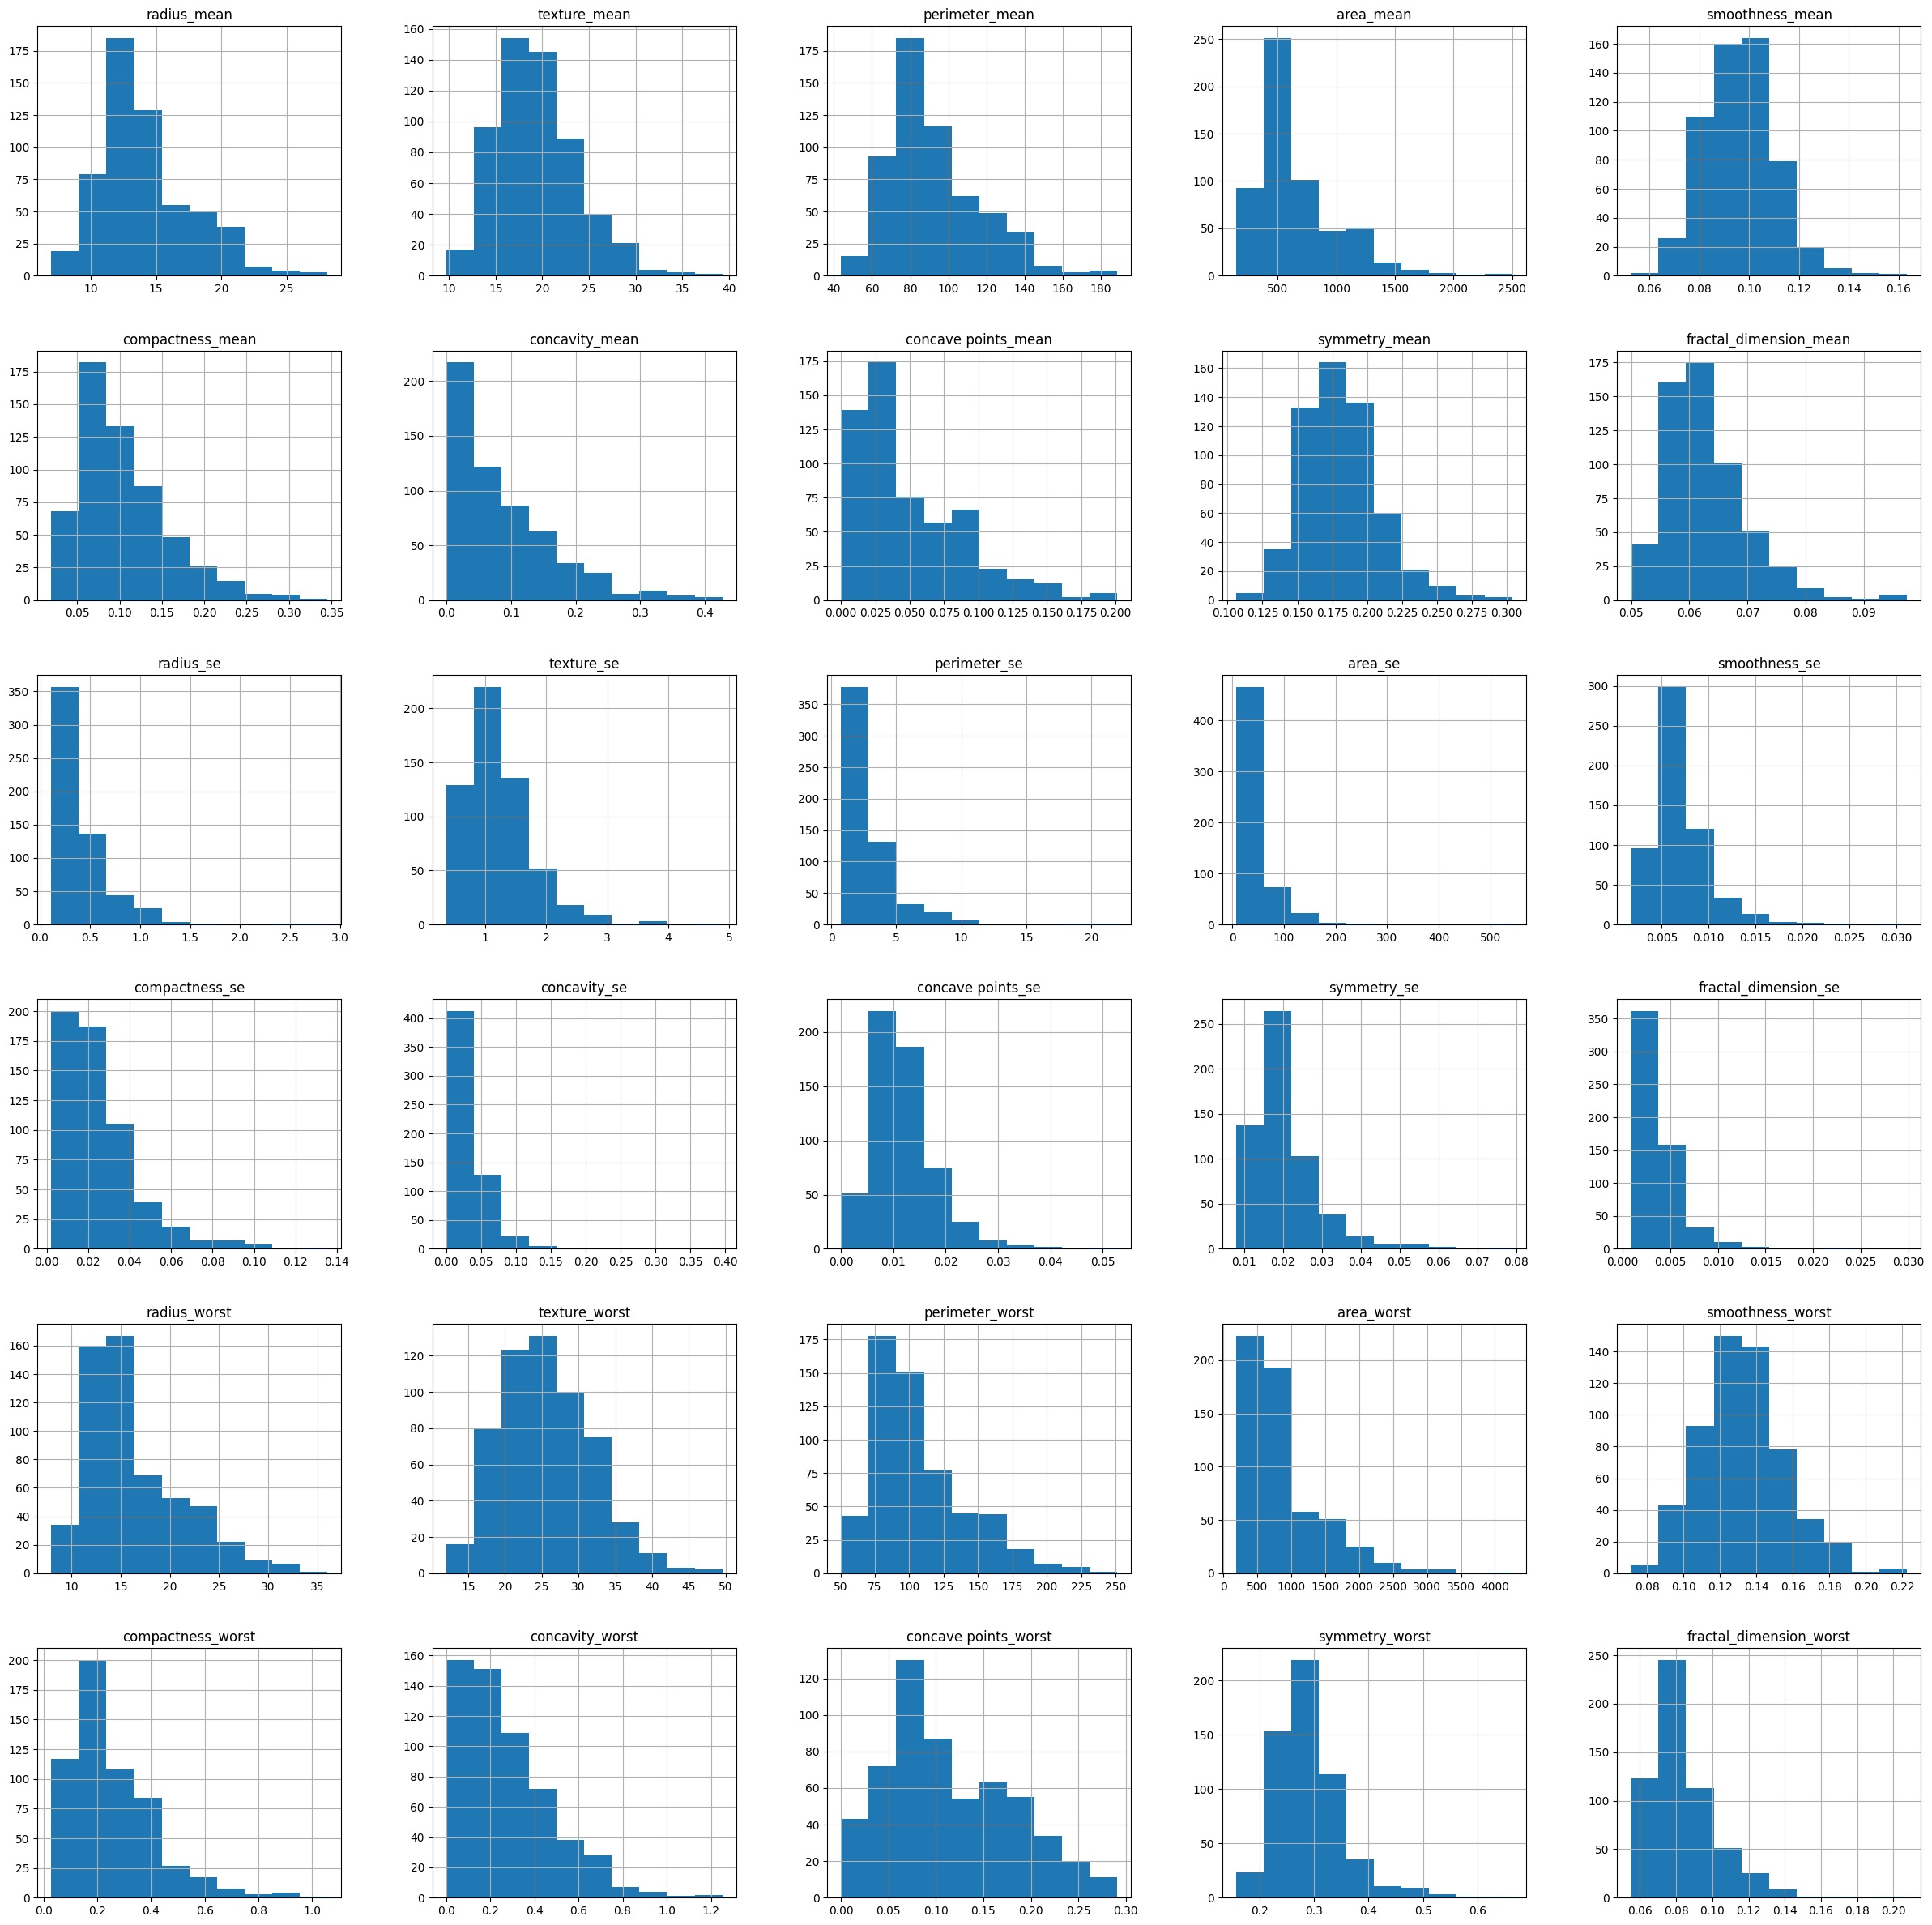

In [5]:
df.hist(figsize = (30,30))
plt.show()

* The highest frequency radius_mean ranges between 11 and 13
* The highest frequency texture_mean ranges between 16 and 18
* The highest frequency perimeter_mean ranges between 70 and 90 etc.

*  **Boxplot**

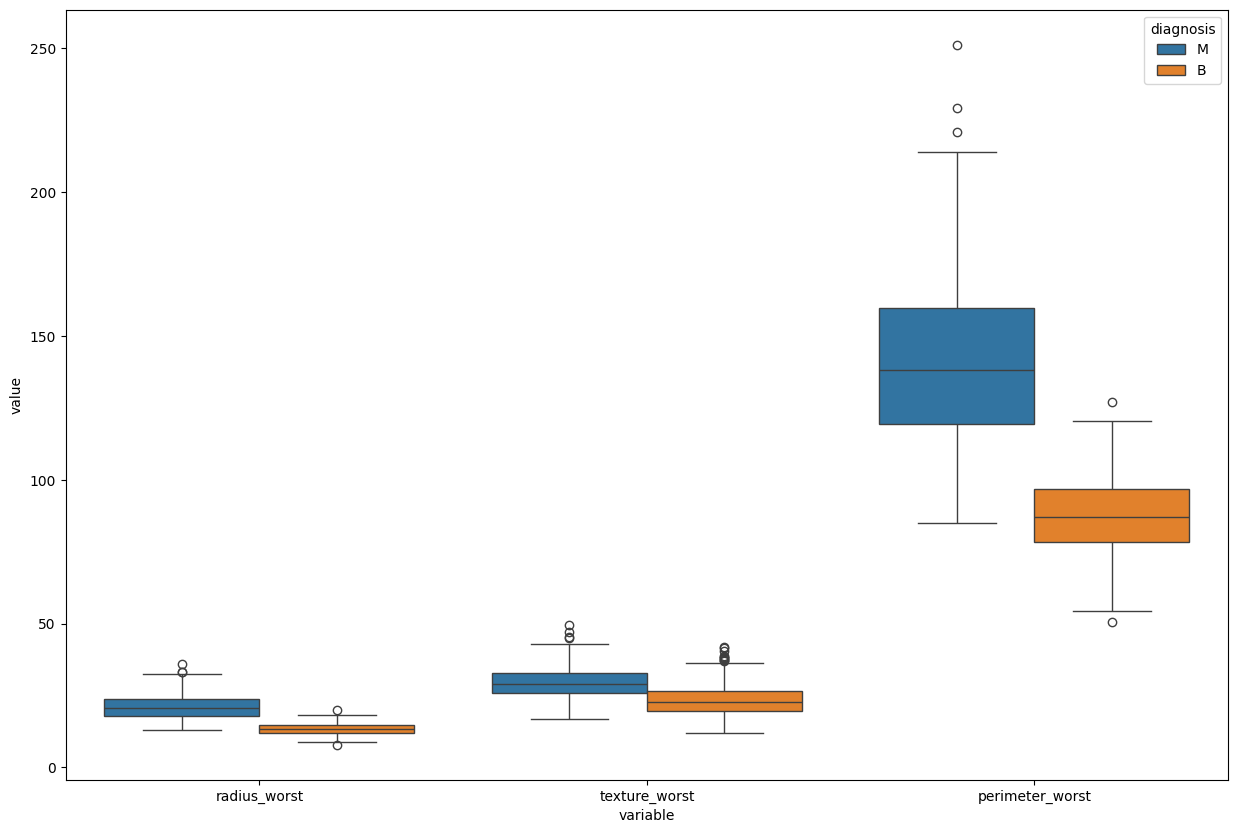

In [8]:
melted_data = pd.melt(df,id_vars = "diagnosis",value_vars = ['radius_worst', 'texture_worst', 'perimeter_worst'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
plt.show()

* Malignant tumor has higher radius_worst,texture_worst and perimeter_worst.
* Has Outliers.

*  **Scatterplot**

<Axes: xlabel='perimeter_mean', ylabel='concavity_mean'>

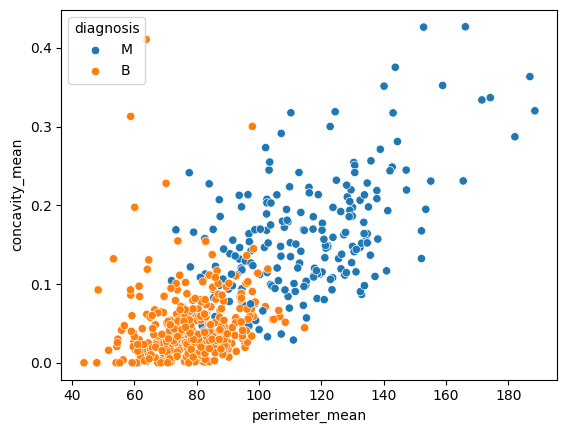

In [9]:
sns.scatterplot(x='perimeter_mean', y='concavity_mean', data=df,hue='diagnosis')

* Tumours with higher perimeter_mean and concavity mean are malignant and tumors with lower perimeter_mean and concavity mean are benign tumors.

<Axes: xlabel='area_mean', ylabel='radius_mean'>

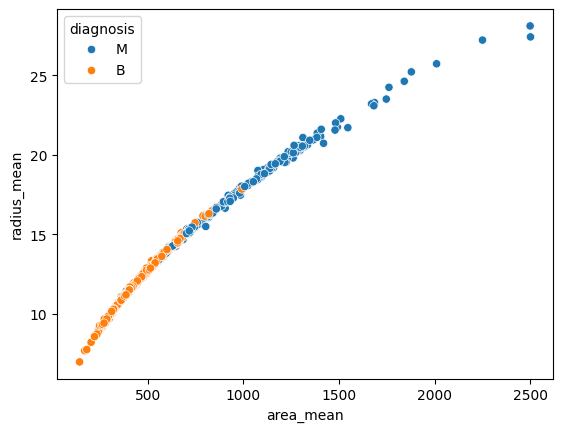

In [10]:
sns.scatterplot(x='area_mean', y='radius_mean', data=df,hue='diagnosis')

* Area_mean and radius_mean are proportional.
* Lower area_mean and lower radius_mean are no cancerous tumor and high area_mean and high radius_mean are cancerous tumors.


* **Scatter Multiple**

In [13]:
#generate a scatter plot with the following columns:

columns = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

sns.pairplot(data=df[columns], hue="diagnosis", palette='rocket')

Output hidden; open in https://colab.research.google.com to view.

* **Density plot**

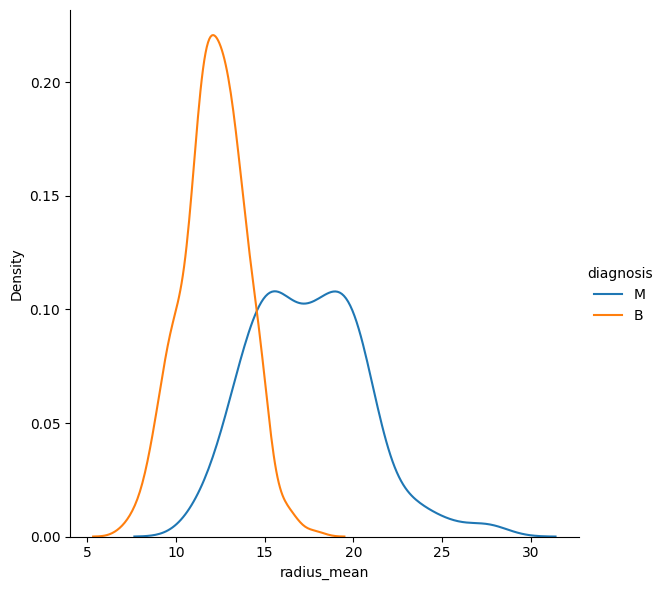

In [34]:
sns.FacetGrid(df, hue="diagnosis", height=6).map(sns.kdeplot, "radius_mean").add_legend()
plt.show()

* Radius between 5 and 20 has higher density for benign tumor and radius between 7 and 32 has higher density for malignant tumor

* **Parallel Chart**

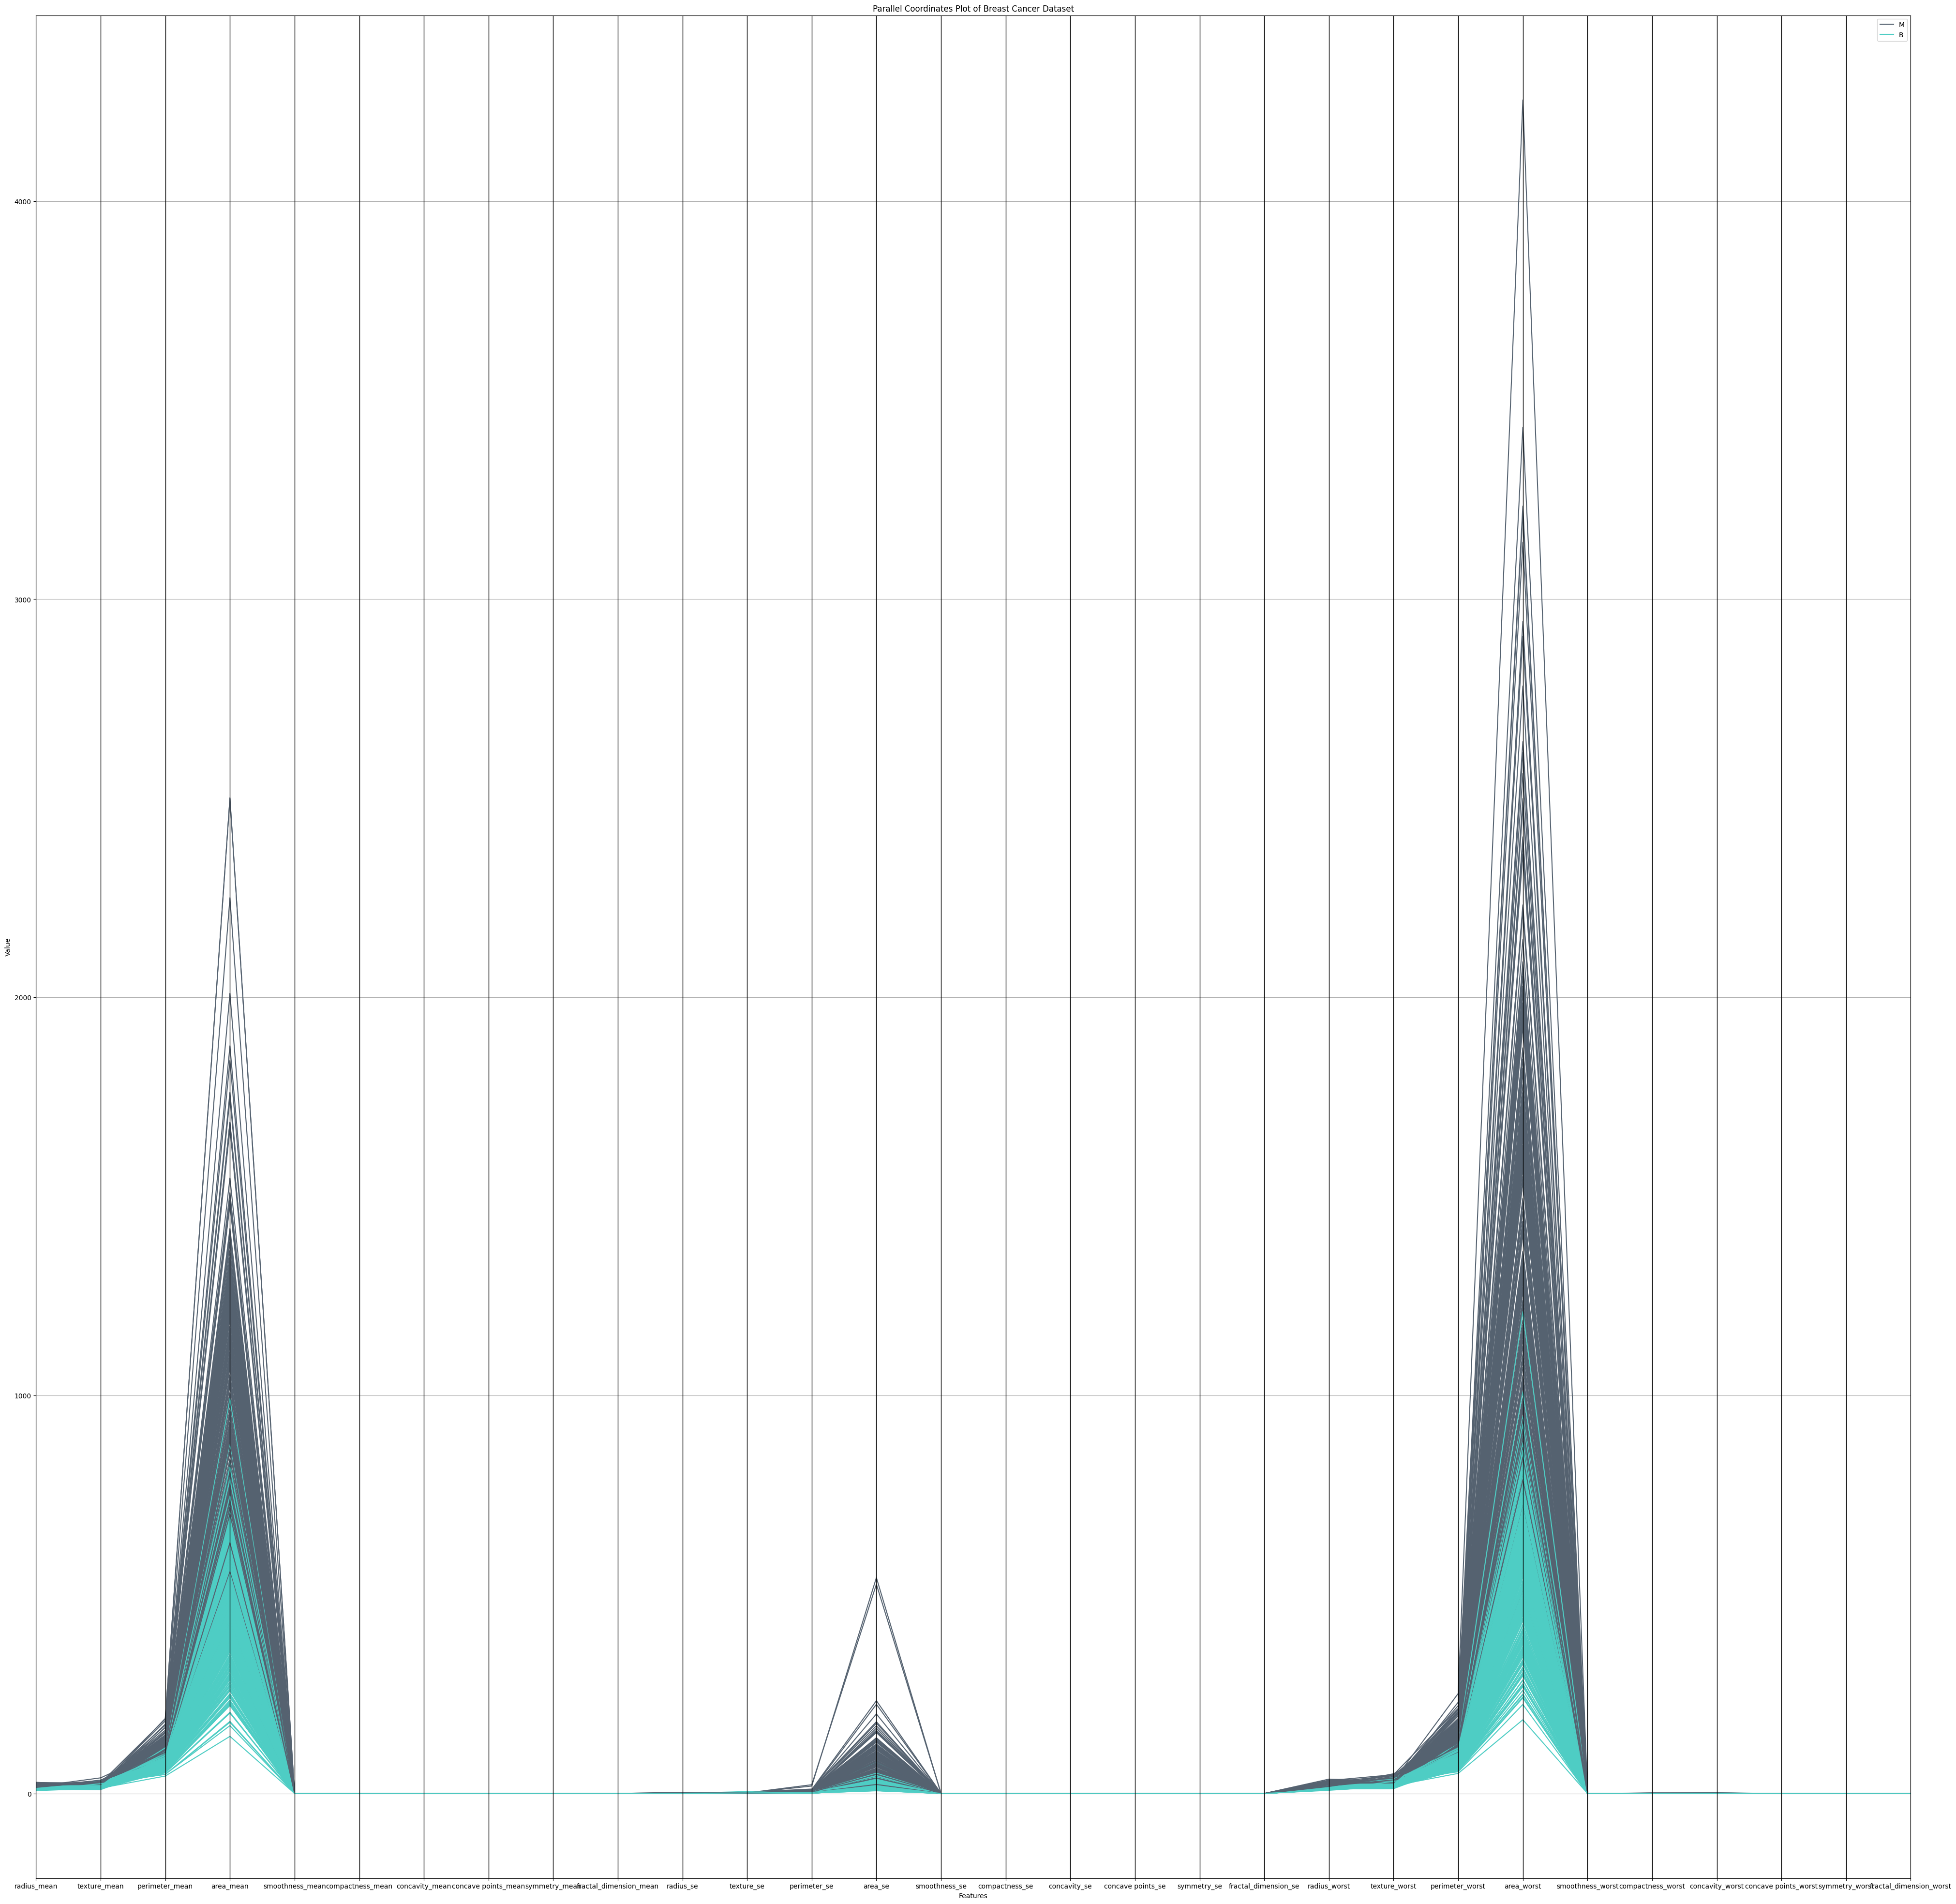

In [33]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(50, 50))
parallel_coordinates(df, class_column='diagnosis', color=['#556270', '#4ECDC4'])
plt.title('Parallel Coordinates Plot of Breast Cancer Dataset')
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()
